<a href="https://colab.research.google.com/github/BEStecher/BEStecher/blob/main/Hurricane_ENSO_Data_Story.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **How does the ENSO Affect the Behavior of Hurricanes?**


**Project 1**


**by  Tianxiao Shen, Guangyu Jiang, and Bryn Stecher**

# 1.Setting Up the Workspace

In [ ]:
!mkdir data

mkdir: cannot create directory ‘data’: File exists


#2.Install packages, import packages and download data

In [ ]:
# Download all relevant packages
%%capture
# These uninstallation must be done to ensure that no version conflicts would happen.
!pip uninstall --yes cartopy 
!pip uninstall --yes shapely
# Shapely and cartopy are used for graphing maps and tracks.
!pip install shapely cartopy --no-binary shapely --no-binary cartopy

#Packages

import pandas as pd #for data structures 
import matplotlib.pyplot as plt #matplotlib for plots
import seaborn as sns # used for visualizing 
import datetime #date time
import numpy as np # numpy
from scipy.stats.stats import pearsonr # for p-value statistics
import cartopy.crs as ccrs # used for map projection
import cartopy.feature as cfeature # used for map projection
import xarray as xr # x-array 
import urllib.request # download request
import warnings # to suppress warnings
from numpy import linalg as LA # to plot the moments (by calculating the eigenvalues)
from sklearn.cluster import k_means # to perform k-means
from collections import Counter # set operations
from scipy.stats import spearmanr,pearsonr,kstest
warnings.filterwarnings('ignore')

In [ ]:
# Download the needed track file
filedata = urllib.request.urlopen('https://www.ncei.noaa.gov/data/international-best-track-archive-for-climate-stewardship-ibtracs/v04r00/access/netcdf/IBTrACS.NA.v04r00.nc')
datatowrite = filedata.read()
 
with open('/content/data/NA_data.nc', 'wb') as f:
    f.write(datatowrite)

# Load the hurricane dataset as tks
tks = xr.open_dataset('data/NA_data.nc', engine="netcdf4", decode_times=False)


El Niño-Southern Oscillation (ENSO) is a climate pattern that occurs roughly every three to seven years that changes the sea surface temperature (SST) of the Pacific Ocean. Both El Niño and La Niña affect weather siginficantly, especially with climate change intensifying.

The Oceanic Niño Index (ONI) is the primary indicator for the ENSO. The ONI tracks the running 3-month average SST in Niño-3.4 region, in the east-central tropical Pacific between 120°-170°W, near the International Dateline, compared to an 30 years period average. El Niño is considered to be present when the ONI is +0.5 or higher, while La Niña exist when the ONI is -0.5 or lower.

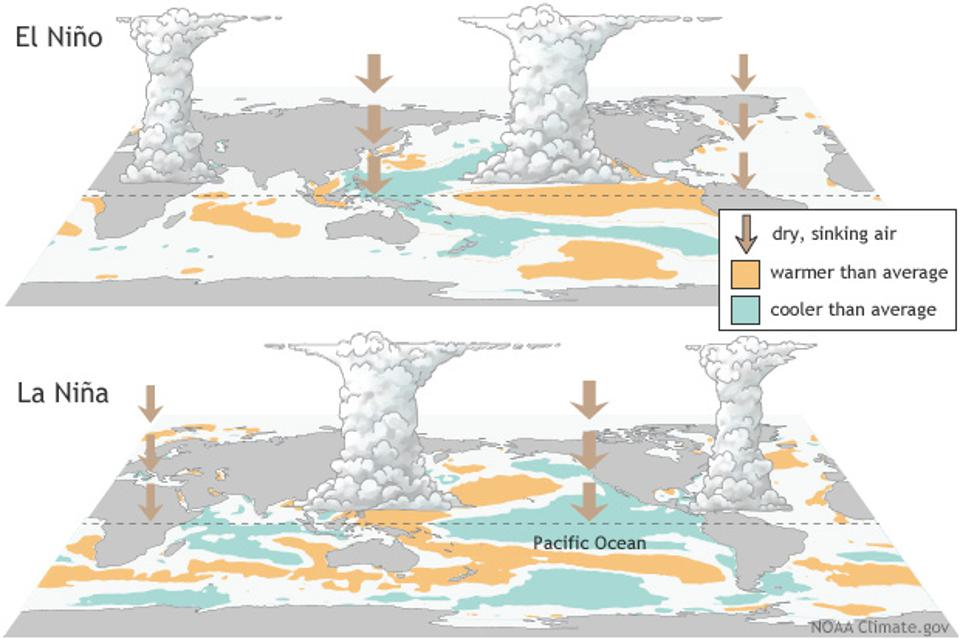

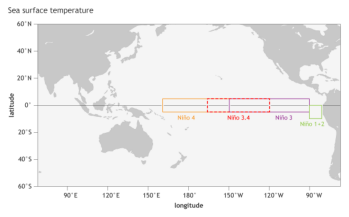

<Figure size 576x720 with 0 Axes>

In [ ]:
#Display Niño-3.4 region
ONI_region = plt.imread("data/Fig3_ENSOindices_SST_610.png")
fig, ax = plt.subplots()
plt.figure(figsize=(8,10))
ax.imshow(ONI_region)
ax.axis('off')
plt.show()

In [ ]:
# Load ONI Data
ENSO_data = pd.read_csv("data/ENSO_data.csv")
ENSO_data = ENSO_data.set_index("Year")
ENSO_data.head()


,DJF,JFM,FMA,MAM,AMJ,MJJ,JJA,JAS,ASO,SON,OND,NDJ,Mean
Year,,,,,,,,,,,,,
1950,-1.5,-1.3,-1.2,-1.2,-1.1,-0.9,-0.5,-0.4,-0.4,-0.4,-0.6,-0.8,-0.86
1951,-0.8,-0.5,-0.2,0.2,0.4,0.6,0.7,0.9,1.0,1.2,1.0,0.8,0.44
1952,0.5,0.4,0.3,0.3,0.2,0.0,-0.1,0.0,0.2,0.1,0.0,0.1,0.17
1953,0.4,0.6,0.6,0.7,0.8,0.8,0.7,0.7,0.8,0.8,0.8,0.8,0.71
1954,0.8,0.5,0.0,-0.4,-0.5,-0.5,-0.6,-0.8,-0.9,-0.8,-0.7,-0.7,-0.38


Text(0.5, 1.0, 'Annually ONI from 1950 to 2021')

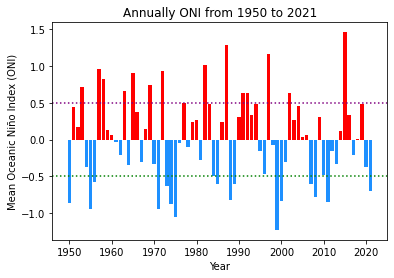

In [ ]:
#Annual ONI
plt.bar(ENSO_data.index[ENSO_data.Mean>=0],ENSO_data.Mean[ENSO_data.Mean>=0], color="red")
plt.bar(ENSO_data.index[ENSO_data.Mean<0],ENSO_data.Mean[ENSO_data.Mean<0], color="dodgerblue")
plt.axhline(y=0.5,ls=":",c="purple")
plt.axhline(y=-0.5,ls=":",c="green")
plt.xlabel("Year")
plt.ylabel("Mean Oceanic Niño Index (ONI)")
plt.title("Annually ONI from 1950 to 2021")

|**El Niño** |          |         |              | **La Niña** |          |         |
|:-----------:|:--------:|:-------:|:------------:|:-----------:|:--------:|:-------:|
| Weak        | Moderate | Strong  | Very Strong  | Weak        | Moderate | Strong  |
| 1952-53     | 1951-52  | 1957-58 | 1982-83      | 1954-55     | 1955-56  | 1973-74 |
| 1953-54     | 1963-64  | 1965-66 | 1997-98      | 1964-65     | 1970-71  | 1975-76 |
| 1958-59     | 1968-69  | 1972-73 | 2015-16      | 1971-72     | 1995-96  | 1988-89 |
| 1969-70     | 1986-87  | 1987-88 |              | 1974-75     | 2011-12  | 1998-99 |
| 1976-77     | 1994-95  | 1991-92 |              | 1983-84     | 2020-21  | 1999-00 |
| 1977-78     | 2002-03  |         |              | 1984-85     |          | 2007-08 |
| 1979-80     | 2009-10  |         |              | 2000-01     |          | 2010-11 |
| 2004-05     |          |         |              | 2005-06     |          |         |
| 2006-07     |          |         |              | 2008-09     |          |         |
| 2014-15     |          |         |              | 2016-17     |          |         |
| 2018-19     |          |         |              | 2017-18     |
</p>




# 3.Functions to visualize tracks

In [ ]:
def map_background(label=False, extent=[-100, 0, 0, 60]):
  # A helpder function for creating the map background.
  # INPUT:
  # "extent": corresponds to the location information of the showed map.
  # "label": boolean

  # OUTPUT:
  # Matplotlib AXES object

  plt.figure(figsize = (20, 10))
  ax = plt.axes(projection=ccrs.PlateCarree())
  ax.coastlines()
  ax.set_extent(extent)
  ax.gridlines(draw_labels=label) # show labels or not
  LAND = cfeature.NaturalEarthFeature('physical', 'land', '10m', 
                                      edgecolor='face', 
                                      facecolor=cfeature.COLORS['land'],
                                          linewidth=.1)
  OCEAN = cfeature.NaturalEarthFeature('physical', 'ocean', '10m',
                                       edgecolor='face', 
                                       facecolor=cfeature.COLORS['water'], linewidth=.1)
  ax.add_feature(LAND, zorder=0)
  ax.add_feature(OCEAN)
  return ax

In [ ]:
# These are helper functions to conveniently plot one single track.
def get_lon_lat(storm):
  lon_lst = storm.lon.values
  lat_lst = storm.lat.values
  return lon_lst[~np.isnan(lon_lst)], lat_lst[~np.isnan(lat_lst)]

In [ ]:
def get_moments(storm):
  # A function to calculate the track moments given a storm
  # OUTPUT:
  # X-centroid, Y-centroid, X_var, Y_var, XY_var

  # Note that:
  # In this case, no weights are set. In other words, all weights are 1.
  # This can be adjusted to explore different results

  lon_lst, lat_lst = get_lon_lat(storm)
  # If the track only has one point, there is no point in calculating the moments
  if len(lon_lst)<= 1: return None 
  lon_weighted, lat_weighted = np.mean(lon_lst), np.mean(lat_lst)
  cv = np.ma.cov([lon_lst, lat_lst])
  return [lon_weighted, lat_weighted, cv[0, 0], cv[1, 1], cv[0, 1]]

In [ ]:
# !!! Note that even though it's a convention to place latitude before longitude, 
# to work with cartopy projection, longitude MUST be placed first. !!!
def plot_one_track(ax, storm, color='blue', all_track=True, marker_color='black'):
  # INPUT: 
  # ax: Matplotlib axes object 
  # storm: a Xarray DATASET object (this can be adjusted if desired)
  # all_track: plot the whole track or just the origin

  # OUTPUT:
  # None
  
  lon_lst, lat_lst = get_lon_lat(storm)
  lon_weighted, lat_weighted, lon_var, lat_var, xy_var = get_moments(storm)

  # Rotate the circle and calculate points on the circle
  # Set N larger to make the oval more precise and to consume more electricity
  N=1000 
  t = np.linspace(0, 2 * np.pi, N)
  circle = [np.sqrt(lon_var) * np.cos(t), np.sqrt(lat_var) * np.sin(t)]
  _, R_rot = LA.eig(np.array([[lon_var, xy_var], [xy_var, lat_var]]))
  circle = np.dot(R_rot, circle)
  R_1, R_2 = circle[0, :] + lon_weighted, circle[1, :] + lat_weighted
  year = storm.season.values
  if all_track:
    ax.plot(lon_lst, lat_lst, '-o', color=color, linewidth=2, markersize=3) # marker='.'
    ax.plot(lon_lst[-1], lat_lst[-1], color=marker_color, marker='x', markersize=10)
  ax.plot(lon_lst[0], lat_lst[0], color=marker_color, marker='*', markersize=10)
  ax.text(lon_lst[0], lat_lst[0]-2, str(storm.name.values)[2:-1], horizontalalignment='center')
  ax.plot(R_1, R_2, '-', color='black', linewidth=1)
  ax.plot([circle[0,0], circle[0,int(N/2)]]+lon_weighted, 
        [circle[1,0], circle[1,int(N/2)]]+lat_weighted, '-gh')
  ax.plot([circle[0,int(N/4)], circle[0,int(N*3/4)]]+lon_weighted, 
        [circle[1,int(N/4)], circle[1,int(N*3/4)]]+lat_weighted, '-gh')

We draw 4 graphs showing all hurricane tracks in different years to compare different pattern of annual hurricanes when strong El Niño or La Niña occurs. The first two are El Niño, and hurricanes seem to be concentrated near the land, while for the next two pictures for La Niña, hurricanes are more sparse and further away from land.

There are 12 storms in the year 2015.



Text(0.5, 1.0, 'Tracks in year 2015(Very Strong El Niño)')

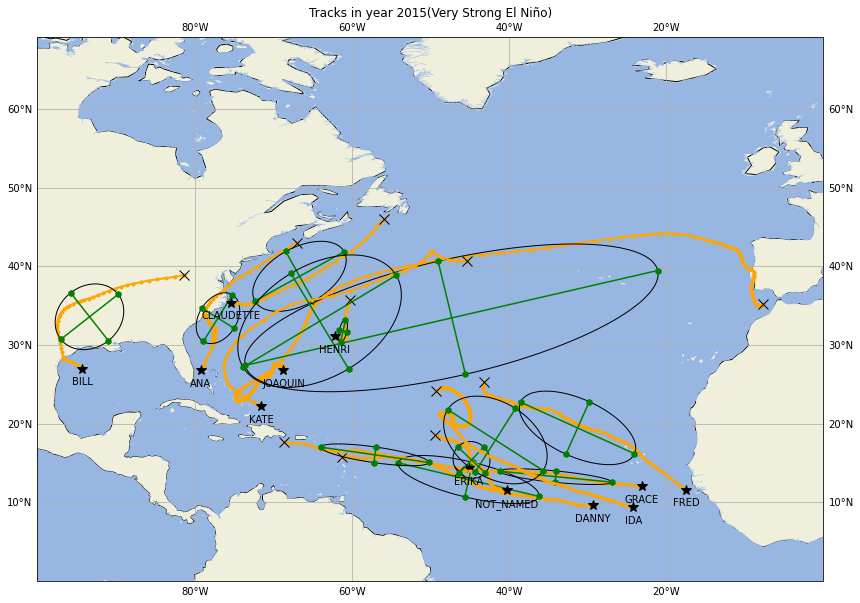

In [ ]:
year=2015 # Very Strong El Niño 
storms = tks.where(tks.season==2015, drop=True) # select the hurricanes that happened in year 2015
print(f"There are {storms.dims['storm']} storms in the year {year}.\n")
storm_num = storms.dims['storm']
ax = map_background(extent=[-100, 0, 0, 60], label=True)

for ind in range(storm_num): 
  storm = storms.sel(storm=ind)
  plot_one_track(ax, storm, color='orange')
plt.title(f"Tracks in year {year}(Very Strong El Niño)")

There are 9 storms in the year 1997.



Text(0.5, 1.0, 'Tracks in year 1997(Very Strong El Niño)')

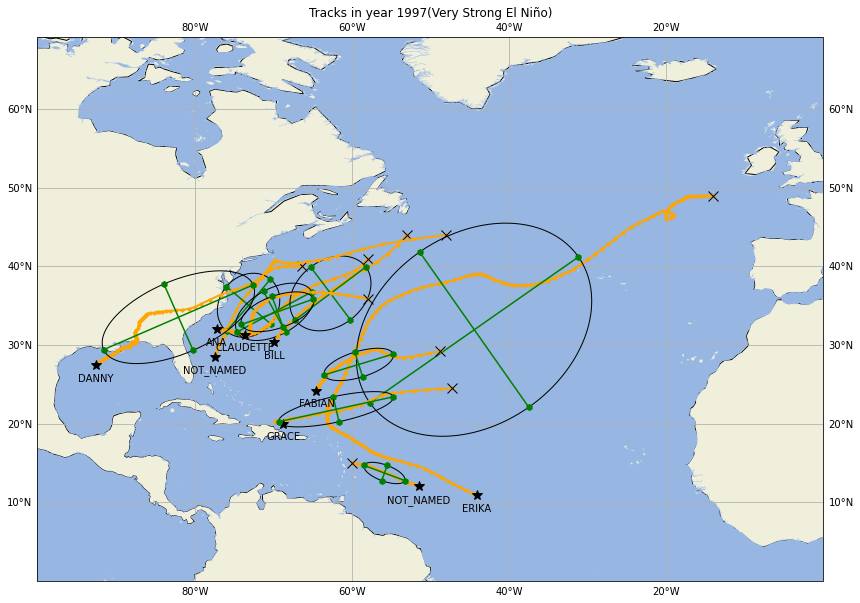

In [ ]:
year=1997 # Very Strong El Niño 
storms = tks.where(tks.season==1997, drop=True) # select the hurricanes that happened in year 1998
print(f"There are {storms.dims['storm']} storms in the year {year}.\n")
storm_num = storms.dims['storm']
ax = map_background(extent=[-100, 0, 0, 60], label=True)

for ind in range(storm_num): 
  storm = storms.sel(storm=ind)
  plot_one_track(ax, storm, color='orange')
plt.title(f"Tracks in year {year}(Very Strong El Niño)")
# plt.legend()

There are 14 storms in the year 1998.



Text(0.5, 1.0, 'Tracks in year 1998(Strong La Niña)')

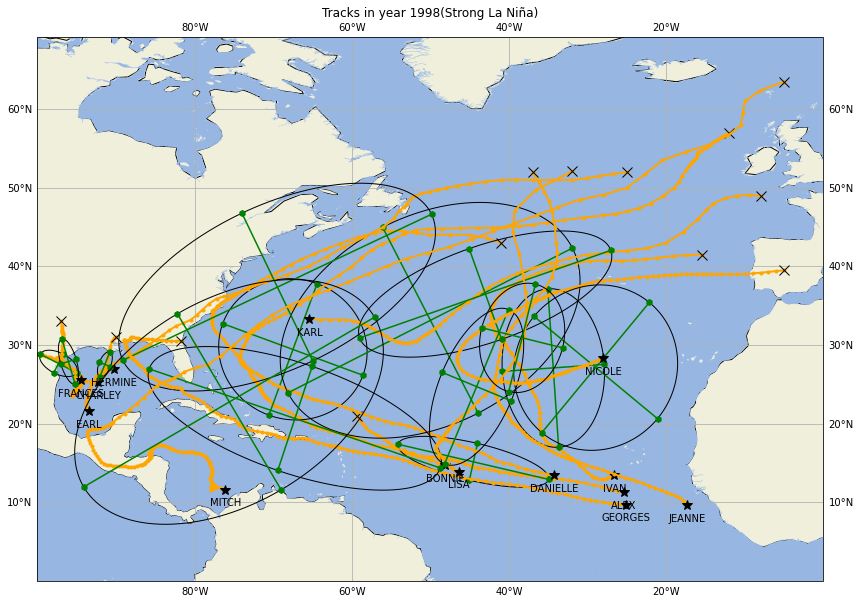

In [ ]:
year=1998 #Strong La Niña
storms = tks.where(tks.season==1998, drop=True) # select the hurricanes that happened in year 1998
print(f"There are {storms.dims['storm']} storms in the year {year}.\n")
storm_num = storms.dims['storm']
ax = map_background(extent=[-100, 0, 0, 60], label=True)

for ind in range(storm_num): 
  storm = storms.sel(storm=ind)
  plot_one_track(ax, storm, color='orange')
plt.title(f"Tracks in year {year}(Strong La Niña)")
# plt.legend()

There are 21 storms in the year 2010.



Text(0.5, 1.0, 'Tracks in year 2010(Strong La Niña)')

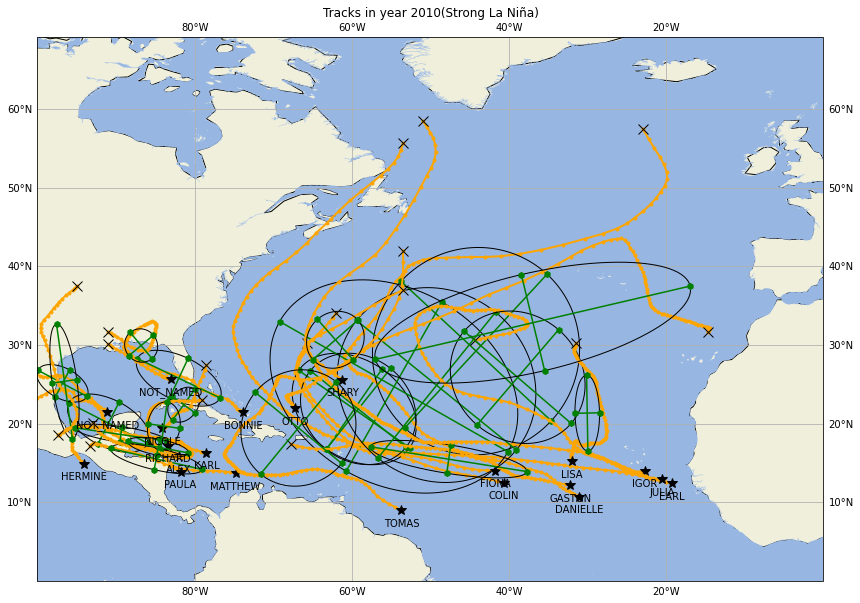

In [ ]:
year=2010 #Strong La Niña
storms = tks.where(tks.season==2010, drop=True) # select the hurricanes that happened in year 1998
print(f"There are {storms.dims['storm']} storms in the year {year}.\n")
storm_num = storms.dims['storm']
ax = map_background(extent=[-100, 0, 0, 60], label=True)

for ind in range(storm_num): 
  storm = storms.sel(storm=ind)
  plot_one_track(ax, storm, color='orange')
plt.title(f"Tracks in year {year}(Strong La Niña)")
# plt.legend()

In [ ]:
# Sort Monthly ONI Data
NEW = ENSO_data.drop(columns = ["Mean"])
NEW = NEW.stack()
NEW = pd.DataFrame(NEW)
ENSO_data_monthly = NEW.reset_index()
ENSO_data_monthly.columns = ["Year","Month","ONI"]

# Obtain string for months
MONTH = ENSO_data_monthly["Month"].unique()
months = np.linspace(1,12,12)

# Create Lagged ONI Data
ENSO_data_monthly["ONI_delay1"] = ENSO_data_monthly["ONI"].shift(1)
ENSO_data_monthly["ONI_delay2"] = ENSO_data_monthly["ONI"].shift(2)
ENSO_data_monthly["ONI_delay3"] = ENSO_data_monthly["ONI"].shift(3)
ENSO_data_monthly["ONI_delay4"] = ENSO_data_monthly["ONI"].shift(4)
ENSO_data_monthly["ONI_delay5"] = ENSO_data_monthly["ONI"].shift(5)
ENSO_data_monthly.head()

,Year,Month,ONI,ONI_delay1,ONI_delay2,ONI_delay3,ONI_delay4,ONI_delay5
0,1950,DJF,-1.5,NaN,NaN,NaN,NaN,NaN
1,1950,JFM,-1.3,-1.5,NaN,NaN,NaN,NaN
2,1950,FMA,-1.2,-1.3,-1.5,NaN,NaN,NaN
3,1950,MAM,-1.2,-1.2,-1.3,-1.5,NaN,NaN
4,1950,AMJ,-1.1,-1.2,-1.2,-1.3,-1.5,NaN


#4.Storm Counts in months of every year




In [ ]:
# Find the start time for every storm
tks["start_time"] = tks["iso_time"][:,0].astype(str)
# Find the month and day when each storm occurs
tks["month"] = xr.apply_ufunc(lambda x: pd.to_datetime(x).month, tks.start_time)
tks["day"] = xr.apply_ufunc(lambda x: pd.to_datetime(x).day, tks.start_time)

In [ ]:
# Count the number of hurricanes in each month
monthly_counts = []
for i in months:
  monthly_counts.append(tks.where(tks.month==i, drop=True).dims["storm"])

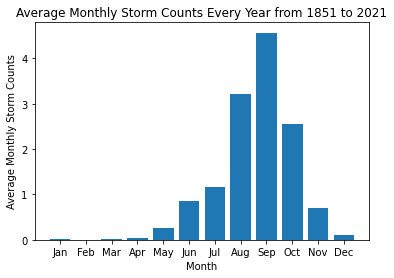

In [ ]:
# Plot the monthly distrubution of hurricane counts
plt.bar(months,np.divide(monthly_counts,2021-1851))
plt.title("Average Monthly Storm Counts Every Year from 1851 to 2021")
plt.xlabel("Month")
plt.ylabel("Average Monthly Storm Counts")
plt.xticks(np.linspace(1,12,12),["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"],rotation=0)
plt.show()

A hurricane is catogrized to occur in a month if its start date is in that month. From the plot above, we find that the average hurricane counts reaches peak in September. So the monthly analysis of hurricane is focused on September, to eliminate the seasonal effect.

# 5.Does ENSO advance or delay the hurricane season within a year?
Yearly ENSO vs. Average Wind Start Date


In [ ]:
# Calculate the average hurricane start date (presented in decimal month)
Average_Start_Month = []
for y in ENSO_data.index:
  Selected = tks.where(tks.season==y, drop=True)
  Average_Start_Month.append(Selected.month.values.mean() + Selected.day.values.mean()/31)
ENSO_data["Average_Start"] = Average_Start_Month

ENSO_data.to_csv("data/Part1.csv")

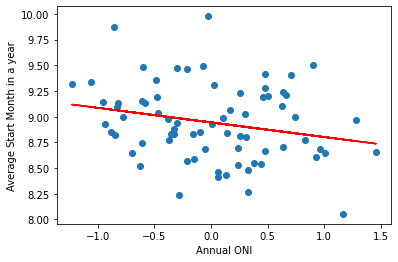

(-0.235746946930866, 0.0461996758045134)

In [ ]:
# Read the saved data for plot
Part1_data = pd.read_csv("data/Part1.csv")
z=np.polyfit(Part1_data['Mean'],Part1_data['Average_Start'],1)
p=np.poly1d(z)
plt.scatter(Part1_data['Mean'],Part1_data['Average_Start'])
plt.plot(Part1_data['Mean'],p(Part1_data['Mean']),color="red")
#plt.title("Average Start Month in a year vs ONI")
plt.xlabel("Annual ONI")
plt.ylabel("Average Start Month in a year")
plt.show()
pearsonr(Part1_data['Mean'],Part1_data['Average_Start'])

This part as observed a significant but weak correlation between yearly average ONI and average hurricane start date. Indicating the fact that a strong El Nino could potentially advance the hurricane season, while a strong La Nina could delay the hurricane season.

# 6.Does ENSO raise or lower the frequency of hurricanes? 
Yearly ENSO v.s Yearly Hurricane Counts


In [ ]:
# Calculate the yearly hurricane counts
Hurricane_counts = []
for y in ENSO_data.index:
  Hurricane_counts.append(tks.where(tks.season==y, drop=True).dims["storm"])
ENSO_data["Counts"] = Hurricane_counts

ENSO_data.to_csv("data/Part2_1.csv")

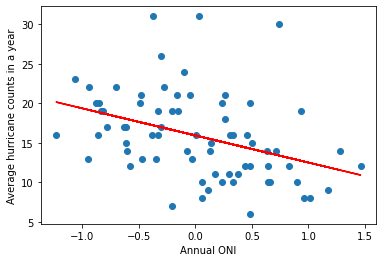

(-0.3866081268074376, 0.0007950355827253207)

In [ ]:
# Read the saved data for plot
Part2_1_data = pd.read_csv("data/Part2_1.csv")
z=np.polyfit(Part2_1_data['Mean'],Part2_1_data['Counts'],1)
p=np.poly1d(z)
plt.scatter(Part2_1_data['Mean'],Part2_1_data['Counts'])
plt.plot(Part2_1_data['Mean'],p(Part2_1_data['Mean']),color="red")
plt.xlabel("Annual ONI")
plt.ylabel("Average hurricane counts in a year")
plt.show()
pearsonr(Part2_1_data['Mean'],Part2_1_data['Counts'])

Text(0.5, 1.0, 'Relationship between Hurricane Count and Mean ONI Over Time')

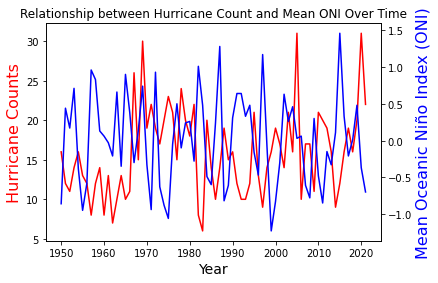

In [ ]:
#Yearly ENSO vs. Monthly Hurricane Counts
fig,ax = plt.subplots()

X = Part2_1_data.Year
y1 = Part2_1_data.Counts
y2 = Part2_1_data.Mean

#add first line to plot
ax.plot(X, y1, color="r")

#add x-axis label
ax.set_xlabel('Year', fontsize=14)

#add y-axis label
ax.set_ylabel('Hurricane Counts', color="r", fontsize=16)

#define second y-axis that shares x-axis with current plot
ax2 = ax.twinx()

#add second line to plot
ax2.plot(X, y2, color="b")

#add second y-axis label
ax2.set_ylabel('Mean Oceanic Niño Index (ONI)', color="b", fontsize=16)
plt.title("Relationship between Hurricane Count and Mean ONI Over Time")

Monthly ENSO v.s. Monthly Hurricane Counts (September)

We consider the ONI in September since hurricanes usually reach a peak in September.

In [ ]:
## Calculate the monthly hurricane counts
MonthlyStorm = []
tks.load()

for i in ENSO_data.index:
  for j in months:
    MonthlyStorm.append(tks.where(xr.ufuncs.logical_and(tks.season==i, tks.month==j), drop=True).dims["storm"])

ENSO_data_monthly["Counts"] = MonthlyStorm[0:863]
ENSO_data_monthly.to_csv("data/Part2_2.csv")

In [ ]:
Part2_2_data = pd.read_csv("data/Part2_2.csv")
Part2_2_data.drop(["Unnamed: 0"], axis = 1,inplace = True)

# Select the data in September as the object for analysis
ONI_Count = Part2_2_data[Part2_2_data["Month"]=="ASO"]


In [ ]:
col_list = ['ONI', 'ONI_delay1', 'ONI_delay2', 'ONI_delay3', 'ONI_delay4', 'ONI_delay5']
Count_corr = []
Count_pvalue = []

for i in range(6):
  #print(col_list[i])
  corr, pvalue = pearsonr(ONI_Count[col_list[i]],ONI_Count["Counts"])
  Count_corr.append(corr)
  Count_pvalue.append(pvalue)

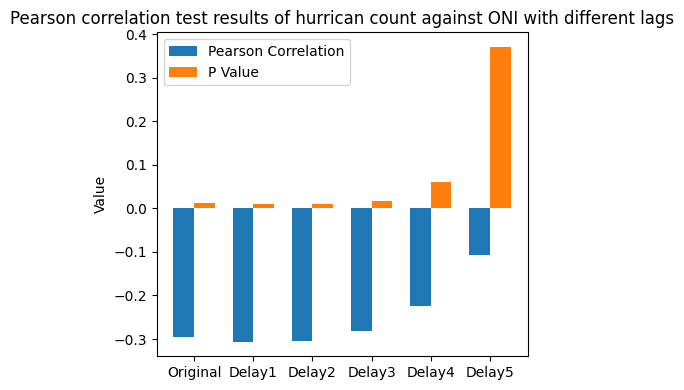

In [ ]:
labels = ['Original', 'Delay1', 'Delay2', 'Delay3', 'Delay4', 'Delay5']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(dpi = 100)
rects1 = ax.bar(x - width/2, Count_corr, width, label='Pearson Correlation')
rects2 = ax.bar(x + width/2, Count_pvalue, width, label='P Value')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Value')
ax.set_title('Pearson correlation test results of hurrican count against ONI with different lags')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()
plt.show()

The analysis of correlation between *monthly hurricane count* and *ONI with different lag* shows a slightly weak but significant negative correlation between El Nino and hurricane counts.

(-0.3058021122072348, 0.008993394100500469)

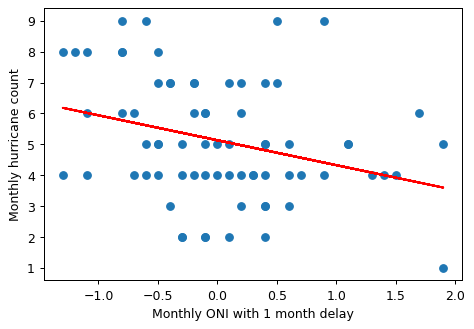

In [ ]:
# Plot the best correlation
fig, ax = plt.subplots(dpi = 90)
z=np.polyfit(ONI_Count['ONI_delay1'],ONI_Count['Counts'],1)
p=np.poly1d(z)
ax.scatter(ONI_Count['ONI_delay1'],ONI_Count['Counts'])
ax.plot(ONI_Count['ONI_delay1'],p(ONI_Count['ONI_delay1']),'-',color="red")
plt.xlabel("Monthly ONI with 1 month delay")
plt.ylabel("Monthly hurricane count")
# Conduct Pearson Correlation Test
pearsonr(ONI_Count['ONI_delay1'],ONI_Count['Counts'])


Since the best correlation is discovered in ONI data with 1\~2 months lag, we conclude that the presence of El Nino 1\~2 months ago would affect the present occurrence of hurricane.
This may indicate a relatively long period before precursurs form the observable hurricanes.

# 7.Does ENSO strengthen or weaken the power of hurricanes?
Monthly ENSO v.s. Monthly Total PDI (September)


We use the power dissipation index(PDI) as a measure of integrated intensity. PDI is a hybrid of the maximum wind speed and the life span, defined as $PDI=∫_1^nV^3dt$, where $n$ is the number of time steps with $dt$ in seconds and $V$ is the wind velocity in meters per second. As for tks dataset, usa_wind is the variable reflecting current wind speed, we examined the dataset and confirmed that usa_wind is collected every 3 hours.

In [ ]:
usa_wind=tks.usa_wind.values
usa_wind_value=np.zeros((2293,1))
PDI=np.zeros(2293)
for i in range(0,2293):
    PDI[i]=sum(np.power((usa_wind[i,][~np.isnan(usa_wind[i,])]),3))*3600*3*pow(0.5144,3)

MONTH = ENSO_data_monthly["Month"].unique()
ENSO_data_monthly['TotalPDI'] = 0

for i in tks.storm:
  table_index = ENSO_data_monthly[(ENSO_data_monthly['Year'] == tks.season[i].values) & (ENSO_data_monthly["Month"] == MONTH[tks.month[i].values-1])].index
  ENSO_data_monthly["TotalPDI"][table_index] += PDI[i-1]

ENSO_data_monthly.to_csv("data/Part3.csv")

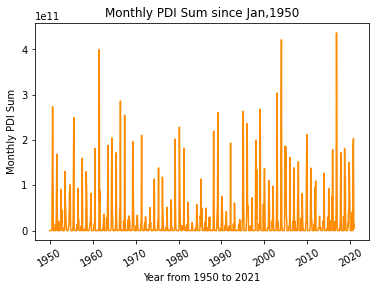

In [ ]:
Part3_data = pd.read_csv("data/Part3.csv")
plt.plot(Part3_data["TotalPDI"],color="darkorange")
plt.xlabel("Year from 1950 to 2021")
plt.ylabel("Monthly PDI Sum")
plt.title("Monthly PDI Sum since Jan,1950")
plt.xticks(np.linspace(0,851,8),["1950","1960","1970","1980","1990","2000","2010","2020"],rotation=30)
plt.show()

In [ ]:
ONI_PDI = Part3_data[Part3_data["Month"]=="ASO"]

X = np.log(ONI_PDI["TotalPDI"])
PDILogNormed = (X - X.mean())/(X.std())
kstest(PDILogNormed,"norm")

KstestResult(statistic=0.09780090796384577, pvalue=0.47323039147223195)

We conduct log-normal transformation to obtain a new variable using PDI, and we use Kolmogorov-Smirnov test to verify its normality. The pvalue for the test is 0.47, larger than 0.05, hence we can not reject the null hypothesis and we think the log-normalied data follows normal distribution.

In [ ]:
col_list = ['ONI', 'ONI_delay1', 'ONI_delay2', 'ONI_delay3', 'ONI_delay4', 'ONI_delay5']
PDI_corr = []
PDI_pvalue = []

for i in range(6):
  #print(col_list[i])
  corr, pvalue = pearsonr(ONI_PDI[col_list[i]],PDILogNormed)
  PDI_corr.append(corr)
  PDI_pvalue.append(pvalue)

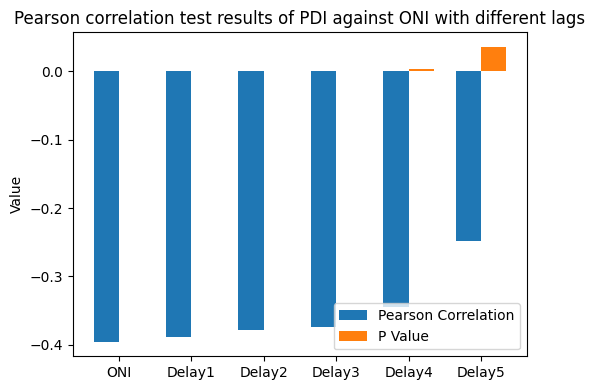

In [ ]:
labels = ['ONI', 'Delay1', 'Delay2', 'Delay3', 'Delay4', 'Delay5']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(dpi=100)
rects1 = ax.bar(x - width/2, PDI_corr, width, label='Pearson Correlation')
rects2 = ax.bar(x + width/2, PDI_pvalue, width, label='P Value')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Value')
ax.set_title('Pearson correlation test results of PDI against ONI with different lags')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()
plt.show()

The analysis of correlation between *monthly total PDI* and *ONI with different lag* shows a moderate but significant negative correlation between ENSO and energy in hurricane.  

The best correlation between monthly PDI and ONI in September is ONI data without any lag, 
which has a correlation factor of -0.3954, and a p-value of 0.0006


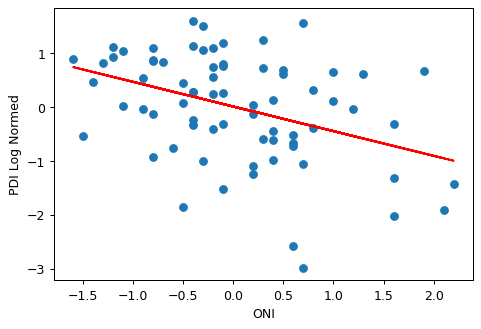

In [ ]:
# Plot the best correlation result among ONI data with different lags
fig, ax = plt.subplots(dpi = 90)
z=np.polyfit(ONI_PDI['ONI'],PDILogNormed,1)
p=np.poly1d(z)
ax.scatter(ONI_PDI['ONI'],PDILogNormed)
ax.plot(ONI_PDI['ONI'],p(ONI_PDI['ONI']),'-',color="red")
plt.xlabel('ONI') 
plt.ylabel('PDI Log Normed')

# Conduct Pearson Correlation Test
pearsonr(ONI_PDI['ONI'],PDILogNormed)
corr, pvalue = pearsonr(ONI_PDI['ONI'],PDILogNormed)

print("The best correlation between monthly PDI and ONI in September is ONI data without any lag, \nwhich has a correlation factor of %.4f, and a p-value of %.4f"%(corr,pvalue))

Since the best correlation is discovered in ONI data without any lag, we conclude that the presence of El Nino affects the intensity of hurricane without any lag.

#8.Conclusion

In this project, we made a comprehensive analysis to show how ENSO affect the behavior of hurricane, which could be concluded in the following three aspects:
1.    A strong El Nino could potentially delay the hurricane season of a year, while a strong La Nina would advance it. (The weak negative correlation between yearly ONI and average storm date)
2.    The occurrence frequency of hurricane could be lowered by El Nino events and raised by La Nina events in the past 1~2 months. (The negative correlation between ONI and hurricane counts, both monthly and yearly)
3.    The intensity of hurricane is apparently weakened by El Nino and strengthened by La Nina without any lag in months. (The moderate and solid negative correlation between monthly ONI and PDI)


# Works Cited

**ENSO Data:**

https://origin.cpc.ncep.noaa.gov/products/analysis_monitoring/ensostuff/ONI_v5.php

https://ggweather.com/enso/oni.htm

**Hurricane Data**

https://www.ncdc.noaa.gov/ibtracs/

Emanuel, K. A., 2005: Increasing destructiveness of tropical cy- clones over the past 30 years. Nature, 436, 686–688.